In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Product

In [2]:
product = pd.read_csv('product.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",",
                     usecols = [0,1,2,3,5,6,7])
product.head()
product.isna().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

# Custom

In [3]:
custom = pd.read_csv('custom.csv', dtype={"CLNT_ID":np.str})
custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [4]:
dummies = pd.get_dummies(custom['CLNT_GENDER'], prefix='GENDER')
custom = pd.concat([custom, dummies], axis=1)
custom.drop("CLNT_GENDER", axis=1, inplace=True)
custom.head(30)

,CLNT_ID,CLNT_AGE,GENDER_F,GENDER_M
0,4830726,30,1,0
1,4830874,40,1,0
2,4830975,30,1,0
3,4831275,30,1,0
4,4825325,30,1,0
5,4825382,40,1,0
6,4825797,40,1,0
7,4825908,30,1,0
8,4825961,30,1,0
9,4840532,40,0,1


# Session

In [5]:
session = pd.read_csv('new_session.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",",
                     usecols=[0,1,3,4,5,6,7])
session.head()
session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
dtype: int64

In [6]:
#session.dropna(inplace=True)
session=session.dropna()

In [7]:
session.isna().sum()

CLNT_ID            0
SESS_ID            0
SESS_DT            0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ZON_NM             0
dtype: int64

In [8]:
session['SESS_DT'] = pd.to_datetime(session['SESS_DT'], format="%Y%m%d")
session['SESS_month'] = pd.DatetimeIndex(session['SESS_DT']).month
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,SESS_month
0,5873599,08641867,2018-05-09,82.0,1890.0,mobile,Daejeon,5
1,5873599,06616320,2018-06-11,105.0,1604.0,mobile,Busan,6
2,5873599,05886172,2018-06-24,41.0,632.0,mobile,Daejeon,6
3,5873884,01050889,2018-09-13,160.0,1035.0,mobile,Gyeonggi-do,9
4,5874461,10298270,2018-04-12,13.0,298.0,mobile,Seoul,4


In [9]:
#categorical variable to dummy
categorical_features = ['DVC_CTG_NM', 'ZON_NM', 'SESS_month']
prefix_name = ["DVC","ZON","month"]

for i in range(3):
    dummies = pd.get_dummies(session[categorical_features[i]], prefix=prefix_name[i])
    session = pd.concat([session, dummies], axis=1)
    session.drop(categorical_features[i], axis=1, inplace=True)
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,5873599,08641867,2018-05-09,82.0,1890.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5873599,06616320,2018-06-11,105.0,1604.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5873599,05886172,2018-06-24,41.0,632.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5873884,01050889,2018-09-13,160.0,1035.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5874461,10298270,2018-04-12,13.0,298.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


# Master

In [10]:
master = pd.read_csv('new_Master.csv',
                     usecols=[0,5])
master.head()

,PD_C,CLAC0_NM
0,64382,스포츠/레저
1,62282,패션의류
2,61729,유아동
3,61537,패션의류
4,58820,패션의류


In [11]:
labels, uniques = pd.factorize(master['CLAC0_NM'],sort=True)
print(uniques)

Index(['가구/침구/인테리어', '가전/디지털', '반려동물', '스포츠/레저', '식품', '여행/서비스/금융', '유아동',
       '주방/생활/건강', '패션의류', '화장품/뷰티'],
      dtype='object')


In [12]:
pd.get_dummies(labels, prefix='CLAC0')

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0


In [13]:
dummies = pd.get_dummies(labels, prefix='CLAC0')
master = pd.concat([master, dummies], axis=1)
master.drop("CLAC0_NM", axis=1, inplace=True)
master.head()

,PD_C,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,64382,0,0,0,1,0,0,0,0,0,0
1,62282,0,0,0,0,0,0,0,0,1,0
2,61729,0,0,0,0,0,0,1,0,0,0
3,61537,0,0,0,0,0,0,0,0,1,0
4,58820,0,0,0,0,0,0,0,0,1,0


# Merge

In [14]:
m1 = pd.merge(product, custom, on='CLNT_ID', how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M
0,4140076,10189797,13,570603,데상트,39000,2,40,1,0
1,4140076,10342512,23,422358,크록스,39900,1,40,1,0
2,4140076,06526651,22,196272,프레드페리,47600,1,40,1,0
3,4140076,08326529,199,305965,아디다스(의류),46700,1,40,1,0
4,4140076,08891563,19,305965,아디다스(의류),46700,1,40,1,0


In [15]:
m1 = pd.merge(m1, master, on=['PD_C'], how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,4140076,10189797,13,570603,데상트,39000,2,40,1,0,0,0,0,1,0,0,0,0,0,0
1,4148106,06537318,21,570603,데상트,39000,1,30,1,0,0,0,0,1,0,0,0,0,0,0
2,4148106,06662803,94,570603,데상트,39000,1,30,1,0,0,0,0,1,0,0,0,0,0,0
3,5298612,04443505,129,570603,데상트,39000,1,30,1,0,0,0,0,1,0,0,0,0,0,0
4,5553084,06453463,55,570603,데상트,39000,1,30,1,0,0,0,0,1,0,0,0,0,0,0


In [16]:
m1 = pd.merge(m1, session, on=['CLNT_ID','SESS_ID'], how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,4140076,10189797,13,570603,데상트,39000,2,40,1,0,...,0,0,0,0,1,0,0,0,0,0
1,4140076,10189797,13,411029,아디다스(의류),29000,1,40,1,0,...,0,0,0,0,1,0,0,0,0,0
2,4148106,06537318,21,570603,데상트,39000,1,30,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4148106,06662803,94,570603,데상트,39000,1,30,1,0,...,0,0,1,0,0,0,1,0,0,0
4,4148106,06662803,94,529438,라코스테(의류),88000,1,30,1,0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
m1.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_BRA_NM', 'PD_BUY_AM',
       'PD_BUY_CT', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'CLAC0_0', 'CLAC0_1',
       'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7',
       'CLAC0_8', 'CLAC0_9', 'SESS_DT', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [18]:
m1_mean = m1.groupby(['CLNT_ID'])['HITS_SEQ','PD_BUY_AM','PD_BUY_CT','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','CLNT_AGE','GENDER_F','GENDER_M'].agg(['mean'])
m1_mean.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M
,mean,mean,mean,mean,mean,mean,mean,mean
CLNT_ID,,,,,,,,
0000008,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1
0000014,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0
0000032,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1
0000056,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0
0000058,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0


In [19]:
m1_factor = m1.loc[:, m1.columns.str.startswith('DVC') | m1.columns.str.startswith('ZON') | 
                   m1.columns.str.startswith('month') | m1.columns.str.startswith('CLAC0') ]
m1_factor.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
m1_sum = pd.concat([m1['CLNT_ID'], m1_factor], axis=1).groupby(['CLNT_ID']).agg(['sum'])
m1_sum.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
0000014,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
0000032,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
0000056,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
0000058,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


In [21]:
m2 = pd.concat([m1_mean, m1_sum], axis=1)
m2.columns = m2.columns.get_level_values(0)
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,CLAC0_0,CLAC0_1,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
0000014,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
0000032,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
0000056,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
0000058,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


In [145]:
categorical_features=['CLAC0_0','CLAC0_1','CLAC0_2','CLAC0_3','CLAC0_4','CLAC0_5','CLAC0_6','CLAC0_7','CLAC0_8','CLAC0_9']
m3=m2.drop(categorical_features[i], axis=1)

# K-means

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tqdm

In [20]:
#F_20 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==20)]

NameError: name 'm2' is not defined

In [31]:
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,5873599,08641867,2018-05-09,82.0,1890.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5873599,06616320,2018-06-11,105.0,1604.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5873599,05886172,2018-06-24,41.0,632.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5873884,01050889,2018-09-13,160.0,1035.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5874461,10298270,2018-04-12,13.0,298.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [137]:
m3.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'CLAC0_0',
       'CLAC0_1', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7',
       'CLAC0_8', 'CLAC0_9', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet',
       'ZON_Busan', 'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do',
       'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju',
       'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do',
       'ZON_Incheon', 'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do',
       'ZON_Seoul', 'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9'],
      dtype='object')

In [111]:
continuous_cols=['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE']
categorical_cols=['GENDER_F', 'GENDER_M', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet',
       'ZON_Busan', 'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do',
       'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju',
       'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do',
       'ZON_Incheon', 'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do',
       'ZON_Seoul', 'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9']

In [112]:
mms = MinMaxScaler()
mms.fit(m3[continuous_cols])
data_transformed = mms.transform(m3[continuous_cols])
CL_idx=m3[categorical_cols].index
scaled_m3=pd.DataFrame(data_transformed,index=CL_idx)

In [113]:
shape(scaled_m3),shape(m3[categorical_cols])

((671497, 6), (671497, 27))

In [114]:
df_cluster=pd.concat([m3[categorical_cols],scaled_m3],axis=1)

In [115]:
df_cluster.head()

,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,ZON_Chungcheongnam-do,ZON_Daegu,ZON_Daejeon,...,month_6,month_7,month_8,month_9,0,1,2,3,4,5
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,0,1,0.0,2.0,0,0.0,0.0,0.0,0.0,0,...,2.0,0.0,0.0,0.0,0.112224,0.002329,0.0,0.091365,0.015908,0.142857
0000014,1,0,0.0,2.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,2.0,0.567134,0.002138,0.0,0.512048,0.271386,0.285714
0000032,0,1,0.0,5.0,0,5.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,5.0,0.114228,0.000938,0.0,0.195181,0.082903,0.428571
0000056,1,0,0.0,3.0,0,3.0,0.0,0.0,0.0,0,...,1.0,0.0,2.0,0.0,0.092852,0.000481,0.0,0.089692,0.044230,0.428571
0000058,1,0,0.0,6.0,0,6.0,0.0,0.0,0.0,0,...,0.0,6.0,0.0,0.0,0.416834,0.001337,0.0,0.389558,0.120837,0.285714


In [225]:
Sum_of_squared_distances = []
K = range(1,15)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    Sum_of_squared_distances.append(km.inertia_)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [29:34<00:00, 185.19s/it]


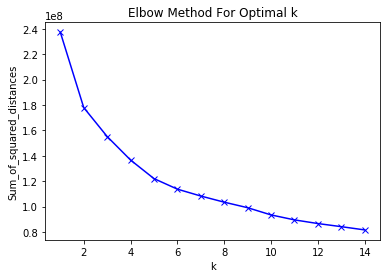

In [226]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [195]:
k=4
km = KMeans(n_clusters=4,algorithm='auto')
km.fit(df_cluster)
km_predict = pd.DataFrame(km.predict(df_cluster),index=CL_idx)
km_predict.columns=['predict']

In [116]:
df_cluster.columns

Index([             'GENDER_F',              'GENDER_M',
                 'DVC_desktop',            'DVC_mobile',
                  'DVC_tablet',             'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do',
                   'ZON_Daegu',           'ZON_Daejeon',
              'ZON_Gangwon-do',           'ZON_Gwangju',
             'ZON_Gyeonggi-do',  'ZON_Gyeongsangbuk-do',
        'ZON_Gyeongsangnam-do',           'ZON_Incheon',
                 'ZON_Jeju-do',      'ZON_Jeollabuk-do',
            'ZON_Jeollanam-do',             'ZON_Seoul',
                   'ZON_Ulsan',               'month_4',
                     'month_5',               'month_6',
                     'month_7',               'month_8',
                     'month_9',                       0,
                             1,                       2,
                             3,                       4,
                             5],
      dtype='object')

In [118]:
df_cluster.head()

,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,ZON_Chungcheongnam-do,ZON_Daegu,ZON_Daejeon,...,month_6,month_7,month_8,month_9,0,1,2,3,4,5
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,0,1,0.0,2.0,0,0.0,0.0,0.0,0.0,0,...,2.0,0.0,0.0,0.0,0.112224,0.002329,0.0,0.091365,0.015908,0.142857
0000014,1,0,0.0,2.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,2.0,0.567134,0.002138,0.0,0.512048,0.271386,0.285714
0000032,0,1,0.0,5.0,0,5.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,5.0,0.114228,0.000938,0.0,0.195181,0.082903,0.428571
0000056,1,0,0.0,3.0,0,3.0,0.0,0.0,0.0,0,...,1.0,0.0,2.0,0.0,0.092852,0.000481,0.0,0.089692,0.044230,0.428571
0000058,1,0,0.0,6.0,0,6.0,0.0,0.0,0.0,0,...,0.0,6.0,0.0,0.0,0.416834,0.001337,0.0,0.389558,0.120837,0.285714


In [196]:
df_cluster.shape
km_cluster = pd.concat([df_cluster, km_predict],axis=1)['predict']
km_cluster

CLNT_ID
0000008    0
0000014    0
0000032    0
0000056    0
0000058    0
0000059    0
0000063    0
0000064    0
0000068    0
0000071    0
0000073    0
0000078    0
0000089    0
0000093    0
0000104    0
0000106    0
0000114    0
0000121    0
0000129    0
0000135    0
0000148    0
0000156    0
0000159    0
0000178    0
0000200    0
0000212    0
0000215    0
0000217    0
0000222    0
0000230    0
          ..
6592368    0
6592369    0
6592389    0
6592393    0
6592398    0
6592400    0
6592402    0
6592405    0
6592406    0
6592408    0
6592410    0
6592435    0
6592442    0
6592452    0
6592461    0
6592462    0
6592470    0
6592475    0
6592481    0
6592482    0
6592485    0
6592488    0
6592502    0
6592503    0
6592506    0
6592519    0
6592524    0
6592537    0
6592551    0
6592553    2
Name: predict, Length: 671497, dtype: int32

In [197]:
km_predict['predict'].value_counts()

0    627403
2     39773
1      4315
3         6
Name: predict, dtype: int64

In [198]:
print(uniques)
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

Index(['가구/침구/인테리어', '가전/디지털', '반려동물', '스포츠/레저', '식품', '여행/서비스/금융', '유아동',
       '주방/생활/건강', '패션의류', '화장품/뷰티'],
      dtype='object')


In [199]:
#predict clustering 0
idx=np.where(km_predict['predict']==0)
total0 = km_predict.loc[km_predict.index[idx]]
#predict clustering 1
idx=np.where(km_predict['predict']==1)
total1 = km_predict.loc[km_predict.index[idx]]
#predict clustering 2
idx=np.where(km_predict['predict']==2)
total2 = km_predict.loc[km_predict.index[idx]]
#predict clustering 3
idx=np.where(km_predict['predict']==3)
total3 = km_predict.loc[km_predict.index[idx]]

In [200]:
total0=pd.merge(total0,m2,on=['CLNT_ID'])
total1=pd.merge(total1,m2,on=['CLNT_ID'])
total2=pd.merge(total2,m2,on=['CLNT_ID'])
total3=pd.merge(total3,m2,on=['CLNT_ID'])

In [201]:
total0.columns

Index(['predict', 'HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'CLAC0_0',
       'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5', 'CLAC0_6',
       'CLAC0_7', 'CLAC0_8', 'CLAC0_9', 'DVC_desktop', 'DVC_mobile',
       'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

<BarContainer object of 10 artists>

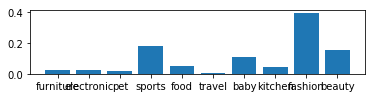

In [202]:
#clustering 1
total0_sum = total0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum = total0_sum.sum()
plt.subplot(3, 1, 1)
plt.bar(labels,total0_sum/sum_of_sum)

<BarContainer object of 10 artists>

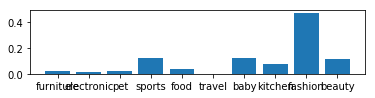

In [203]:
#clustering 2
total1_sum = total1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum = total1_sum.sum()
plt.subplot(3, 1, 1)
plt.bar(labels,total1_sum/sum_of_sum)

<BarContainer object of 10 artists>

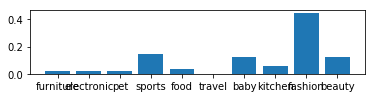

In [204]:
#clustering 3
total2_sum = total2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum = total2_sum.sum()
plt.subplot(3, 1, 1)
plt.bar(labels,total2_sum/sum_of_sum)

<BarContainer object of 10 artists>

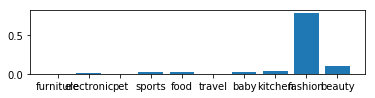

In [205]:
#clustering 4
total3_sum = total3[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum = total3_sum.sum()
plt.subplot(3, 1, 1)
plt.bar(labels,total3_sum/sum_of_sum)

## Visualization 

In [206]:
m4=pd.merge(km_predict,m2,on=['CLNT_ID'])

In [207]:
#cate0
idx=np.where(m4['CLAC0_0']==1)
cate0=m4.loc[m4.index[idx]]
#cate1
idx=np.where(m4['CLAC0_1']==1)
cate1=m4.loc[m4.index[idx]]
#cate2
idx=np.where(m4['CLAC0_2']==1)
cate2=m4.loc[m4.index[idx]]
#cate3
idx=np.where(m4['CLAC0_3']==1)
cate3=m4.loc[m4.index[idx]]
#cate4
idx=np.where(m4['CLAC0_4']==1)
cate4=m4.loc[m4.index[idx]]
#cate5
idx=np.where(m4['CLAC0_5']==1)
cate5=m4.loc[m4.index[idx]]
#cate6
idx=np.where(m4['CLAC0_6']==1)
cate6=m4.loc[m4.index[idx]]
#cate7
idx=np.where(m4['CLAC0_7']==1)
cate7=m4.loc[m4.index[idx]]
#cate8
idx=np.where(m4['CLAC0_8']==1)
cate8=m4.loc[m4.index[idx]]
#cate9
idx=np.where(m4['CLAC0_9']==1)
cate9=m4.loc[m4.index[idx]]

In [208]:
cate0.head()

,predict,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,CLAC0_0,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000461,0,22.250000,246562.500000,1.000000,29.250000,180.250000,50,1,0,1,...,0.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
0000858,0,44.875000,37207.500000,1.000000,59.375000,1076.125000,30,1,0,1,...,0.0,0.0,8.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0
0001177,0,101.000000,86370.000000,1.400000,77.400000,848.400000,40,1,0,1,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
0001291,2,242.205128,26541.538462,1.000000,246.615385,2442.769231,30,1,0,1,...,0.0,0.0,8.0,0.0,15.0,13.0,5.0,1.0,5.0,0.0
0001459,0,65.000000,52600.000000,1.333333,74.333333,966.333333,30,1,0,1,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


In [221]:
pd.value_counts(cate0['predict'].values)

0    20842
2     4300
1      658
dtype: int64

<BarContainer object of 3 artists>

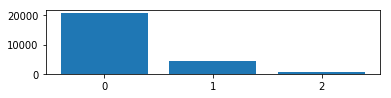

In [222]:
labels2=['0','1','2']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate0['predict'].values))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

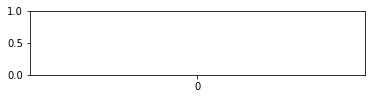

In [224]:
labels2=['0','1','2']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate1['predict'].values))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

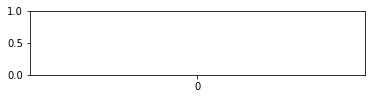

In [214]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate2['predict'].values, sort=False))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

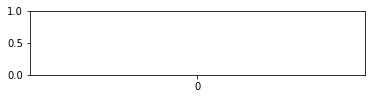

In [215]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate3['predict'].values, sort=False))

<BarContainer object of 4 artists>

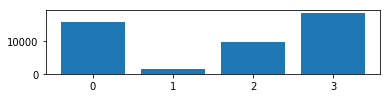

In [179]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate4['predict'].values, sort=False))

<BarContainer object of 4 artists>

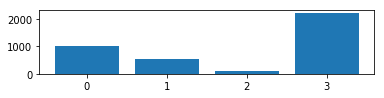

In [180]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate5['predict'].values, sort=False))

<BarContainer object of 4 artists>

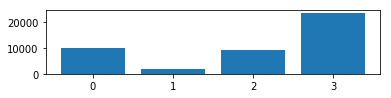

In [181]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate6['predict'].values, sort=False))

<BarContainer object of 4 artists>

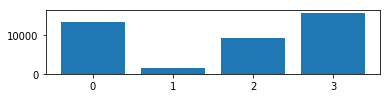

In [182]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate7['predict'].values, sort=False))

<BarContainer object of 4 artists>

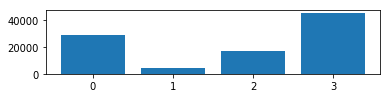

In [183]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate8['predict'].values, sort=False))

<BarContainer object of 4 artists>

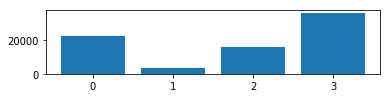

In [184]:
labels2=['0','1','2','3']
plt.subplot(3, 1, 1)
plt.bar(labels2,pd.value_counts(cate9['predict'].values, sort=False))